In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv("db_full_ranked.csv")

In [3]:
df

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,total_points_home,previous_points_home,rank_home,rank_change_home,total_points_away,previous_points_away,rank_away,rank_change_away
0,2018-08-18,Andorra,United Arab Emirates,0.0,0.0,Friendly,Grödig,Austria,True,1120.00,1120.00,130.0,0.0,1312.00,1312.00,77.0,0.0
1,2018-08-18,Grenada,Jamaica,1.0,5.0,Friendly,St. George's,Grenada,False,980.00,980.00,168.0,0.0,1400.00,1400.00,54.0,0.0
2,2018-08-18,Guatemala,Cuba,1.0,0.0,Friendly,Quetzaltenango,Guatemala,False,1064.00,1064.00,146.0,0.0,940.00,940.00,181.0,0.0
3,2018-08-20,Barbados,Jamaica,2.0,2.0,Friendly,Bridgetown,Barbados,False,1005.00,1008.00,160.0,0.0,1400.00,1400.00,54.0,0.0
4,2018-08-26,Barbados,Cuba,0.0,0.0,Friendly,Bridgetown,Barbados,False,1005.00,1008.00,160.0,0.0,940.00,940.00,181.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3330,2022-09-27,Albania,Iceland,1.0,1.0,UEFA Nations League,Tirana,Albania,False,1361.81,1361.81,66.0,0.0,1379.61,1379.61,63.0,0.0
3331,2022-09-27,Norway,Serbia,0.0,2.0,UEFA Nations League,Oslo,Norway,False,1488.57,1488.57,36.0,0.0,1549.53,1549.53,25.0,0.0
3332,2022-09-27,Sweden,Slovenia,1.0,1.0,UEFA Nations League,Stockholm,Sweden,False,1563.44,1563.44,20.0,0.0,1372.48,1372.48,65.0,0.0
3333,2022-09-27,Kosovo,Cyprus,5.0,1.0,UEFA Nations League,Pristina,Kosovo,False,1183.90,1183.90,106.0,0.0,1180.52,1180.52,108.0,1.0


Possíveis features - tudo para ultimos 5 jogos:

- Vitorias por Ranking
- Derrotas por Ranking
- Rank dif
- Rank Change 
- Is friendly
- Gols marcados por ranking
- Gols sofridos por ranking
- Diferença de ranking enfrentado

In [4]:
def result_finder(home, away):
    if home > away:
        return pd.Series([0, 3, 0])
    if home < away:
        return pd.Series([1, 0, 3])
    else:
        return pd.Series([2, 1, 1])

results = df.apply(lambda x: result_finder(x["home_score"], x["away_score"]), axis=1)

In [5]:
df[["result", "home_team_points", "away_team_points"]] = results

In [6]:
df.columns

Index(['date', 'home_team', 'away_team', 'home_score', 'away_score',
       'tournament', 'city', 'country', 'neutral', 'total_points_home',
       'previous_points_home', 'rank_home', 'rank_change_home',
       'total_points_away', 'previous_points_away', 'rank_away',
       'rank_change_away', 'result', 'home_team_points', 'away_team_points'],
      dtype='object')

Suposição -> rank é correlacionado negativamente com total de pontos, então, pra base pra criação de features pode-se usar qualquer um

<AxesSubplot:>

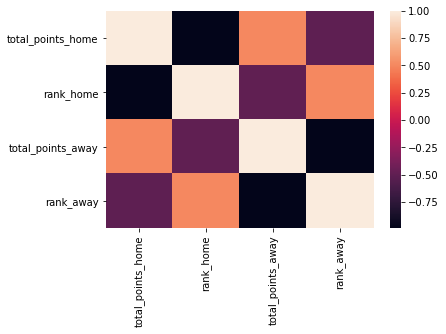

In [7]:
import seaborn as sns

sns.heatmap(df[["total_points_home", "rank_home", "total_points_away", "rank_away"]].corr())



In [8]:
df["rank_dif"] = df["rank_home"] - df["rank_away"]
df["sg"] = df["home_score"] - df["away_score"]
df["points_home_by_rank"] = df["home_team_points"]/df["rank_away"]
df["points_away_by_rank"] = df["away_team_points"]/df["rank_home"]

Possibilidades:
    
    - Rank médio e diferença de rank médio (testar pra full e testar pra 5 jogos, analisar o melhor)
    - Gols marcados por ranking dos times enfrentados (e a diferença)
    - Gols sofridos por ranking dos times enfrentados (e a diferença)
      

In [9]:
df

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,total_points_home,...,previous_points_away,rank_away,rank_change_away,result,home_team_points,away_team_points,rank_dif,sg,points_home_by_rank,points_away_by_rank
0,2018-08-18,Andorra,United Arab Emirates,0.0,0.0,Friendly,Grödig,Austria,True,1120.00,...,1312.00,77.0,0.0,2,1,1,53.0,0.0,0.012987,0.007692
1,2018-08-18,Grenada,Jamaica,1.0,5.0,Friendly,St. George's,Grenada,False,980.00,...,1400.00,54.0,0.0,1,0,3,114.0,-4.0,0.000000,0.017857
2,2018-08-18,Guatemala,Cuba,1.0,0.0,Friendly,Quetzaltenango,Guatemala,False,1064.00,...,940.00,181.0,0.0,0,3,0,-35.0,1.0,0.016575,0.000000
3,2018-08-20,Barbados,Jamaica,2.0,2.0,Friendly,Bridgetown,Barbados,False,1005.00,...,1400.00,54.0,0.0,2,1,1,106.0,0.0,0.018519,0.006250
4,2018-08-26,Barbados,Cuba,0.0,0.0,Friendly,Bridgetown,Barbados,False,1005.00,...,940.00,181.0,0.0,2,1,1,-21.0,0.0,0.005525,0.006250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3330,2022-09-27,Albania,Iceland,1.0,1.0,UEFA Nations League,Tirana,Albania,False,1361.81,...,1379.61,63.0,0.0,2,1,1,3.0,0.0,0.015873,0.015152
3331,2022-09-27,Norway,Serbia,0.0,2.0,UEFA Nations League,Oslo,Norway,False,1488.57,...,1549.53,25.0,0.0,1,0,3,11.0,-2.0,0.000000,0.083333
3332,2022-09-27,Sweden,Slovenia,1.0,1.0,UEFA Nations League,Stockholm,Sweden,False,1563.44,...,1372.48,65.0,0.0,2,1,1,-45.0,0.0,0.015385,0.050000
3333,2022-09-27,Kosovo,Cyprus,5.0,1.0,UEFA Nations League,Pristina,Kosovo,False,1183.90,...,1180.52,108.0,1.0,0,3,0,-2.0,4.0,0.027778,0.000000


In [10]:
home_team = df[["date", "home_team", "home_score", "away_score", "rank_home", "rank_away","rank_change_home", "total_points_home", "result", "rank_dif", "points_home_by_rank", "home_team_points"]]

away_team = df[["date", "away_team", "away_score", "home_score", "rank_away", "rank_home","rank_change_away", "total_points_away", "result", "rank_dif", "points_away_by_rank", "away_team_points"]]

In [11]:
home_team.columns = [h.replace("home_", "").replace("_home", "").replace("away_", "suf_").replace("_away", "_suf") for h in home_team.columns]

away_team.columns = [a.replace("away_", "").replace("_away", "").replace("home_", "suf_").replace("_home", "_suf") for a in away_team.columns]

In [12]:
team_stats = home_team.append(away_team)#.sort_values("date")

In [13]:
team_stats

,date,team,score,suf_score,rank,rank_suf,rank_change,total_points,result,rank_dif,points_by_rank,team_points
0,2018-08-18,Andorra,0.0,0.0,130.0,77.0,0.0,1120.00,2,53.0,0.012987,1
1,2018-08-18,Grenada,1.0,5.0,168.0,54.0,0.0,980.00,1,114.0,0.000000,0
2,2018-08-18,Guatemala,1.0,0.0,146.0,181.0,0.0,1064.00,0,-35.0,0.016575,3
3,2018-08-20,Barbados,2.0,2.0,160.0,54.0,0.0,1005.00,2,106.0,0.018519,1
4,2018-08-26,Barbados,0.0,0.0,160.0,181.0,0.0,1005.00,2,-21.0,0.005525,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3330,2022-09-27,Iceland,1.0,1.0,63.0,66.0,0.0,1379.61,2,3.0,0.015152,1
3331,2022-09-27,Serbia,2.0,0.0,25.0,36.0,0.0,1549.53,1,11.0,0.083333,3
3332,2022-09-27,Slovenia,1.0,1.0,65.0,20.0,0.0,1372.48,2,-45.0,0.050000,1
3333,2022-09-27,Cyprus,1.0,5.0,108.0,106.0,1.0,1180.52,0,-2.0,0.000000,0


In [14]:
team_stats.to_csv("team_stats.csv", index=False)

Panorama das features:

Criadas:
- dif rank
- rank change
- is_friendly (falta o map)

Necessidade:
- sg/rank medio 5 jogos
- vitorias/rank medio 5 jogos
- rank medio enfrentado

In [15]:
stats_val = []

for index, row in team_stats.iterrows():
    team = row["team"]
    date = row["date"]
    past_games = team_stats.loc[(team_stats["team"] == team) & (team_stats["date"] < date)].sort_values(by=['date'], ascending=False)
    last5 = past_games.head(5)
    
    goals = past_games["score"].mean()
    goals_l5 = last5["score"].mean()
    
    goals_suf = past_games["suf_score"].mean()
    goals_suf_l5 = last5["suf_score"].mean()
    
    rank = past_games["rank_suf"].mean()
    rank_l5 = last5["rank_suf"].mean()
    
    if len(last5) > 0:
        points = past_games["total_points"].values[0] - past_games["total_points"].values[-1]#qtd de pontos ganhos
        points_l5 = last5["total_points"].values[0] - last5["total_points"].values[-1] 
    else:
        points = 0
        points_l5 = 0
        
    gp = past_games["team_points"].mean()
    gp_l5 = last5["team_points"].mean()
    
    gp_rank = past_games["points_by_rank"].mean()
    gp_rank_l5 = last5["points_by_rank"].mean()
    
    stats_val.append([goals, goals_l5, goals_suf, goals_suf_l5, rank, rank_l5, points, points_l5, gp, gp_l5, gp_rank, gp_rank_l5])

In [16]:
stats_val[-1]

[1.0232558139534884,
 1.2,
 1.2790697674418605,
 1.4,
 57.906976744186046,
 95.6,
 -92.90000000000009,
 -24.450000000000045,
 1.1395348837209303,
 1.0,
 0.022315442907703067,
 0.009469901168014376]

In [17]:
stats_mean = ["goals_mean", "goals_mean_l5", "goals_suf_mean", "goals_suf_mean_l5", "rank_mean", "rank_mean_l5", "points_mean", "points_mean_l5", "game_points_mean", "game_points_mean_l5", "game_points_rank_mean", "game_points_rank_mean_l5"]

In [18]:
stats_df = pd.DataFrame(stats_val, columns=stats_mean)

full_df = pd.concat([team_stats.reset_index(drop=True), stats_df], axis=1, ignore_index=False)

In [19]:
home_team_stats = full_df.iloc[:int(full_df.shape[0]/2),:]
away_team_stats = full_df.iloc[int(full_df.shape[0]/2):,:]

In [20]:
home_team_stats.columns[-12:]

Index(['goals_mean', 'goals_mean_l5', 'goals_suf_mean', 'goals_suf_mean_l5',
       'rank_mean', 'rank_mean_l5', 'points_mean', 'points_mean_l5',
       'game_points_mean', 'game_points_mean_l5', 'game_points_rank_mean',
       'game_points_rank_mean_l5'],
      dtype='object')

In [21]:
home_team_stats = home_team_stats[home_team_stats.columns[-12:]]
away_team_stats = away_team_stats[away_team_stats.columns[-12:]]

In [22]:
home_team_stats.columns = ['home_'+str(col) for col in home_team_stats.columns]
away_team_stats.columns = ['away_'+str(col) for col in away_team_stats.columns]

In [23]:
match_stats = pd.concat([home_team_stats, away_team_stats.reset_index(drop=True)], axis=1, ignore_index=False)

In [24]:
full_df = pd.concat([df, match_stats.reset_index(drop=True)], axis=1, ignore_index=False)

In [25]:
full_df.columns

Index(['date', 'home_team', 'away_team', 'home_score', 'away_score',
       'tournament', 'city', 'country', 'neutral', 'total_points_home',
       'previous_points_home', 'rank_home', 'rank_change_home',
       'total_points_away', 'previous_points_away', 'rank_away',
       'rank_change_away', 'result', 'home_team_points', 'away_team_points',
       'rank_dif', 'sg', 'points_home_by_rank', 'points_away_by_rank',
       'home_goals_mean', 'home_goals_mean_l5', 'home_goals_suf_mean',
       'home_goals_suf_mean_l5', 'home_rank_mean', 'home_rank_mean_l5',
       'home_points_mean', 'home_points_mean_l5', 'home_game_points_mean',
       'home_game_points_mean_l5', 'home_game_points_rank_mean',
       'home_game_points_rank_mean_l5', 'away_goals_mean',
       'away_goals_mean_l5', 'away_goals_suf_mean', 'away_goals_suf_mean_l5',
       'away_rank_mean', 'away_rank_mean_l5', 'away_points_mean',
       'away_points_mean_l5', 'away_game_points_mean',
       'away_game_points_mean_l5', 'away_

In [26]:
def find_friendly(x):
    if x == "Friendly":
        return 1
    else: return 0

full_df["is_friendly"] = full_df["tournament"].apply(lambda x: find_friendly(x)) 

In [27]:
full_df = pd.get_dummies(full_df, columns=["is_friendly"])

In [28]:
full_df.columns

Index(['date', 'home_team', 'away_team', 'home_score', 'away_score',
       'tournament', 'city', 'country', 'neutral', 'total_points_home',
       'previous_points_home', 'rank_home', 'rank_change_home',
       'total_points_away', 'previous_points_away', 'rank_away',
       'rank_change_away', 'result', 'home_team_points', 'away_team_points',
       'rank_dif', 'sg', 'points_home_by_rank', 'points_away_by_rank',
       'home_goals_mean', 'home_goals_mean_l5', 'home_goals_suf_mean',
       'home_goals_suf_mean_l5', 'home_rank_mean', 'home_rank_mean_l5',
       'home_points_mean', 'home_points_mean_l5', 'home_game_points_mean',
       'home_game_points_mean_l5', 'home_game_points_rank_mean',
       'home_game_points_rank_mean_l5', 'away_goals_mean',
       'away_goals_mean_l5', 'away_goals_suf_mean', 'away_goals_suf_mean_l5',
       'away_rank_mean', 'away_rank_mean_l5', 'away_points_mean',
       'away_points_mean_l5', 'away_game_points_mean',
       'away_game_points_mean_l5', 'away_

In [29]:
base_df = full_df[["date", "home_team", "away_team", "rank_home", "rank_away","home_score", "away_score","result", "rank_dif", "rank_change_home", "rank_change_away", 'home_goals_mean',
       'home_goals_mean_l5', 'home_goals_suf_mean', 'home_goals_suf_mean_l5',
       'home_rank_mean', 'home_rank_mean_l5', 'home_points_mean',
       'home_points_mean_l5', 'away_goals_mean', 'away_goals_mean_l5',
       'away_goals_suf_mean', 'away_goals_suf_mean_l5', 'away_rank_mean',
       'away_rank_mean_l5', 'away_points_mean', 'away_points_mean_l5','home_game_points_mean', 'home_game_points_mean_l5',
       'home_game_points_rank_mean', 'home_game_points_rank_mean_l5','away_game_points_mean',
       'away_game_points_mean_l5', 'away_game_points_rank_mean',
       'away_game_points_rank_mean_l5',
       'is_friendly_0', 'is_friendly_1']]

In [30]:
base_df_no_fg = base_df.dropna()

In [31]:
base_df_no_fg.result.value_counts()

0    1550
1     906
2     744
Name: result, dtype: int64

In [32]:
base_df_no_fg.to_csv("full_db.csv", index=False)